<a href="https://colab.research.google.com/github/NeilCollinsMS/Advanced-Data-Repository/blob/main/Random_Forest_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Math & Portguese Random Forest Regressors**

RandomizedSearchCV is such a cool and customizable function.

Potential building block on going another step: https://datascience.stackexchange.com/questions/58656/how-to-choose-the-model-parameters-randomizedsearchcv-gridsearchcv-or-manual

I don't run through every cell every single time I utilize this notebook (e.g. I don't run randomsearchcv every time). However, I occasionally run cells on accident so errors may appear. If you run every single cell there won't be an error.

In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [ ]:
import pandas as pd
import numpy as np
import os
import io
import eli5
import shap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab import files

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install eli5
!pip install shap

     |████████████████████████████████| 112kB 21.8MB/s 
     |████████████████████████████████| 358kB 20.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=e58142be706259f63740cd218a1f0e02ce2a9a783f496db8999c8fa2be91bae2
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


**Data Importing**

In [ ]:
uploaded = files.upload()
uploaded1 = files.upload()

Saving math.csv to math.csv


Saving port.csv to port.csv


In [ ]:
math = pd.read_csv(io.StringIO(uploaded['math.csv'].decode('utf-8')))

In [ ]:
port = pd.read_csv(io.StringIO(uploaded1['port.csv'].decode('utf-8')))

In [ ]:
display(math.head())
display(port.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


**Data Prepping**

In [ ]:
port.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
port.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
port.paid.replace(('yes', 'no'), (1, 0), inplace=True)
port.activities.replace(('yes', 'no'), (1, 0), inplace=True)
port.nursery.replace(('yes', 'no'), (1, 0), inplace=True)
port.higher.replace(('yes', 'no'), (1, 0), inplace=True)
port.internet.replace(('yes', 'no'), (1, 0), inplace=True)
port.romantic.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
math = pd.get_dummies(math)
port = pd.get_dummies(port)

In [ ]:
display(math.head())
display(port.head())

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


**Math Model**

This model is largely useless. Bad metrics, and was made when we were concerned about G1 & G2 Target Leakage

In [ ]:
y = math.G3
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
            'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'absences'] # Omitted G1, G2, Absences because of target leakage
X = math[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
math_baseline = RandomForestRegressor(max_leaf_nodes= 100, random_state= 1)

math_baseline.fit(X_train,y_train)

math_predictions1 = math_baseline.predict(X_test)

r2_score(y_test,math_predictions1)

0.8698352403948019

Math Grid Search

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(math_baseline.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
math_base = RandomForestRegressor()
math_1 = RandomizedSearchCV(estimator = math_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
math_1.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
math_1.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
true_math = RandomForestRegressor(max_leaf_nodes=1000,bootstrap=True, max_depth=80, max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1000)
true_math.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='sqrt', max_leaf_nodes=1000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
true_math_predictions = true_math.predict(X_test)

r2_score(y_test,true_math_predictions)

0.24548693566466118

In [ ]:
mean_absolute_error(y_test,true_math_predictions)

2.0651310982322513

In [ ]:
mean_squared_error(y_test,true_math_predictions,squared=False)

2.885263339243917

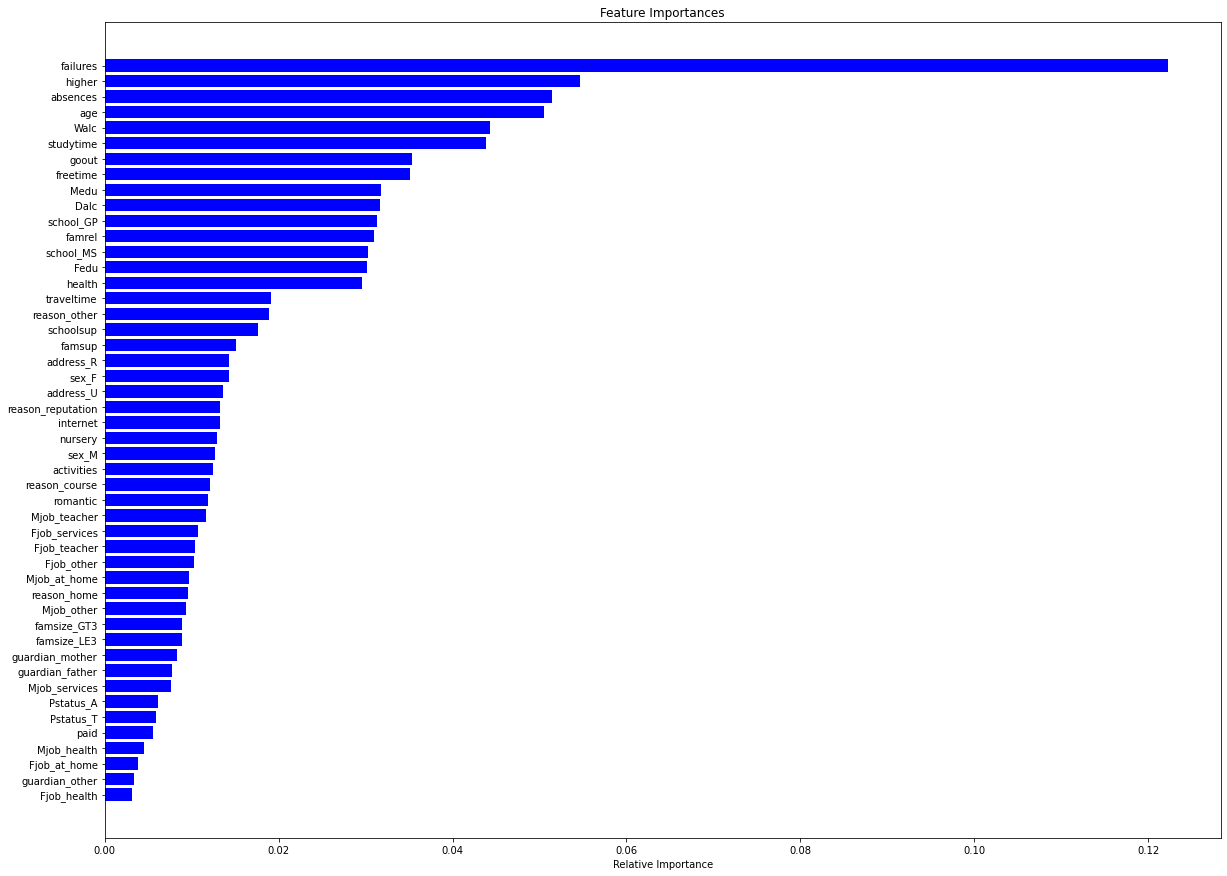

In [ ]:
importances = true_math.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
perm = PermutationImportance(true_math, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0786 ± 0.0371,failures
0.0457 ± 0.0088,higher
0.0207 ± 0.0164,school_MS
0.0117 ± 0.0031,schoolsup
0.0102 ± 0.0160,Fedu
0.0089 ± 0.0138,school_GP
0.0083 ± 0.0039,Medu
0.0076 ± 0.0041,sex_F
0.0072 ± 0.0118,age
0.0069 ± 0.0076,health


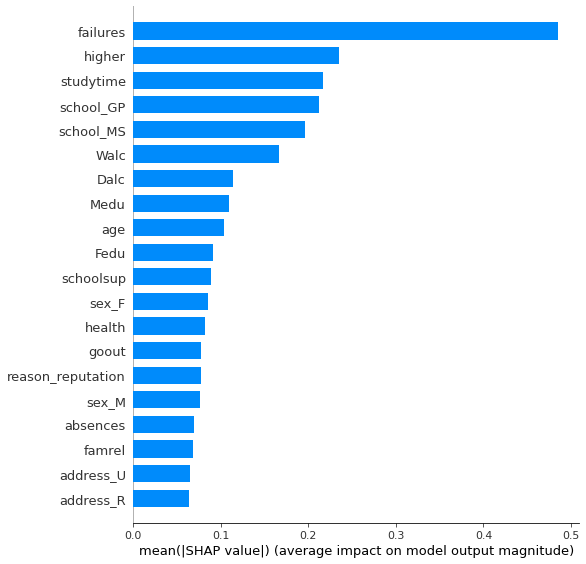

In [ ]:
shap_values = shap.TreeExplainer(true_math).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

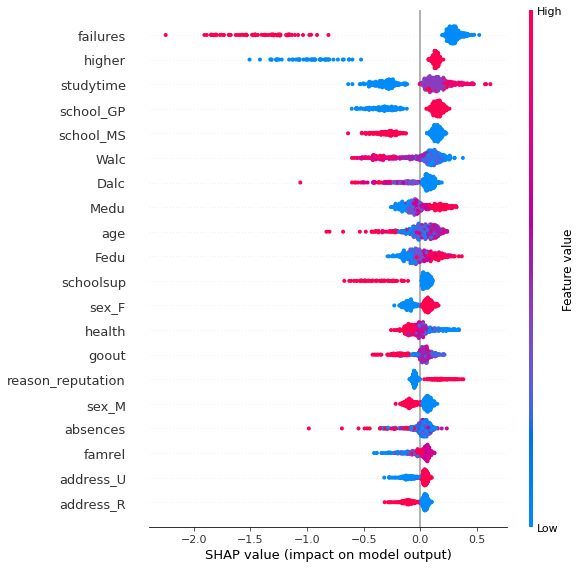

In [ ]:
shap.summary_plot(shap_values, X_train)

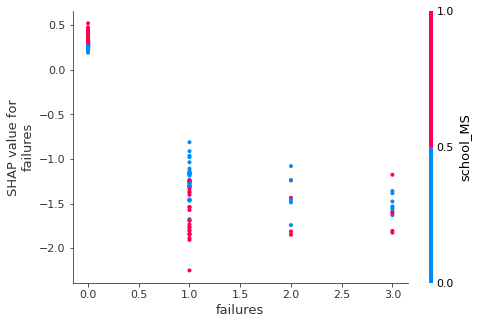

In [ ]:
 shap.dependence_plot("failures", shap_values, X_train)

Note to self: Check exact improvement, example here:
 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

**Math Model w/ G1 & G2**

In [ ]:
y = math.G3
features = ['G1', 'G2', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
            'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'absences'] # Omitted G1, G2, Absences because of target leakage
X = math[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Max Leaf Node selection
max_leaf_nodes = [5, 50, 500, 1000, 5000]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'max_leaf_nodes': max_leaf_nodes}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'max_leaf_nodes': [5, 50, 500, 1000, 5000],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
math_base = RandomForestRegressor()
math_1 = RandomizedSearchCV(estimator = math_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
math_1.fit(X_train, y_train)

NameError: ignored

In [ ]:
math_1.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': 1000,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
true_math_full = RandomForestRegressor(max_leaf_nodes=1000,bootstrap=True, max_depth=10, max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=1600)
true_math_full.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=1000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
true_math_full_predictions = true_math_full.predict(X_test)

r2_score(y_test,true_math_full_predictions)

0.8669821421986412

In [ ]:
mean_absolute_error(y_test,true_math_full_predictions)

0.9852952869256633

In [ ]:
mean_squared_error(y_test,true_math_full_predictions,squared=False)

1.4587615091991788

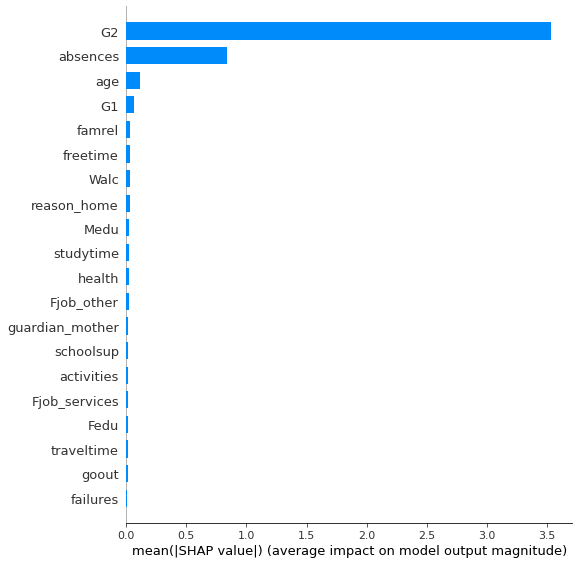

In [ ]:
shap_values = shap.TreeExplainer(true_math_full).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
perm = PermutationImportance(true_math_full, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.5671 ± 0.2258,G2
0.1654 ± 0.0892,absences
0.0074 ± 0.0376,age
0.0051 ± 0.0106,reason_home
0.0039 ± 0.0031,studytime
0.0037 ± 0.0012,famrel
0.0030 ± 0.0032,G1
0.0030 ± 0.0100,health
0.0025 ± 0.0022,guardian_mother
0.0021 ± 0.0009,school_MS


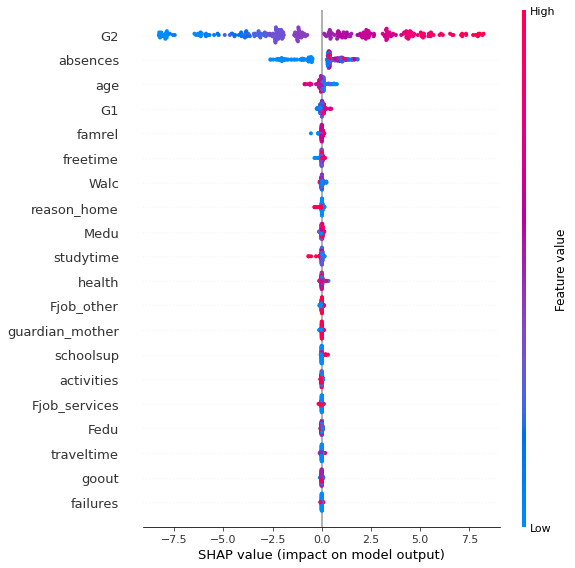

In [ ]:
shap.summary_plot(shap_values, X_train)

**THIS SECTION IS JUST FOR PREDICTION COUNTING FOR BOTH SETS**

In [ ]:
y_test = pd.DataFrame(y_test)

# Uncomment whichever one you need to count

# y_test['predictions'] = true_math_full.predict(X_test)
y_test['predictions'] = true_port_full.predict(X_test)

In [ ]:
y_test.head()

,G3,predictions
440,0,7.175000
242,11,10.735332
465,8,8.863060
347,8,9.559589
474,11,10.922240


In [ ]:
y_test.dtypes

G3               int64
predictions    float64
dtype: object

In [ ]:
y_test.count()

G3             195
predictions    195
dtype: int64

In [ ]:
uns = y_test[y_test['G3']<6]

In [ ]:
uns.count()

G3             5
predictions    5
dtype: int64

In [ ]:
ok = y_test[(y_test['G3'] >= 6) & (y_test['G3'] <= 13)]

In [ ]:
ok.count()

G3             129
predictions    129
dtype: int64

In [ ]:
good = y_test[y_test['G3'] > 13]

In [ ]:
good.count()

G3             61
predictions    61
dtype: int64

In [ ]:
uns = y_test[y_test['predictions']<6]

In [ ]:
uns.count()

G3             1
predictions    1
dtype: int64

In [ ]:
ok = y_test[(y_test['predictions'] >= 6) & (y_test['predictions'] <= 13)]

In [ ]:
ok.count()

G3             126
predictions    126
dtype: int64

In [ ]:
good = y_test[y_test['predictions'] > 13]

In [ ]:
good.count()

G3             68
predictions    68
dtype: int64

**END PREDICTION COUNTER**

**Portuguese Model with G1 & G2** 

Everything below here are random thoughts and setups...will be organized later

In [ ]:
y = port.G3
features = ['G1', 'G2', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
            'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'absences'] 
X = port[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Max Leaf Node selection
max_leaf_nodes = [5, 50, 500, 1000, 5000]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'max_leaf_nodes': max_leaf_nodes}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'max_leaf_nodes': [5, 50, 500, 1000, 5000],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
port_base = RandomForestRegressor()
port_1 = RandomizedSearchCV(estimator = port_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
port_1.fit(X_train, y_train)

NameError: ignored

In [ ]:
port_1.best_params_

NameError: ignored

In [ ]:
true_port_full = RandomForestRegressor(max_leaf_nodes=1000,bootstrap=True, max_depth=70, max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1800)
true_port_full.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=1000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
true_port_full_predictions = true_port_full.predict(X_test)

r2_score(y_test,true_port_full_predictions)

0.748273562959865

In [ ]:
mean_absolute_error(y_test,true_port_full_predictions)

1.036719040756648

In [ ]:
mean_squared_error(y_test,true_port_full_predictions,squared=False)

1.6665428703200376

In [ ]:
perm = PermutationImportance(true_port_full, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4427 ± 0.0189,G2
0.2418 ± 0.0265,G1
0.0204 ± 0.0109,failures
0.0092 ± 0.0056,higher
0.0084 ± 0.0050,school_GP
0.0079 ± 0.0039,absences
0.0054 ± 0.0067,school_MS
0.0040 ± 0.0056,age
0.0031 ± 0.0009,schoolsup
0.0027 ± 0.0032,studytime


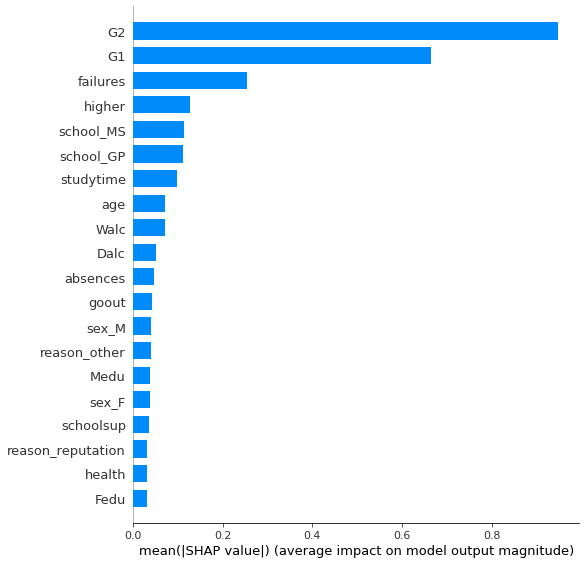

In [ ]:
shap_values = shap.TreeExplainer(true_port_full).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

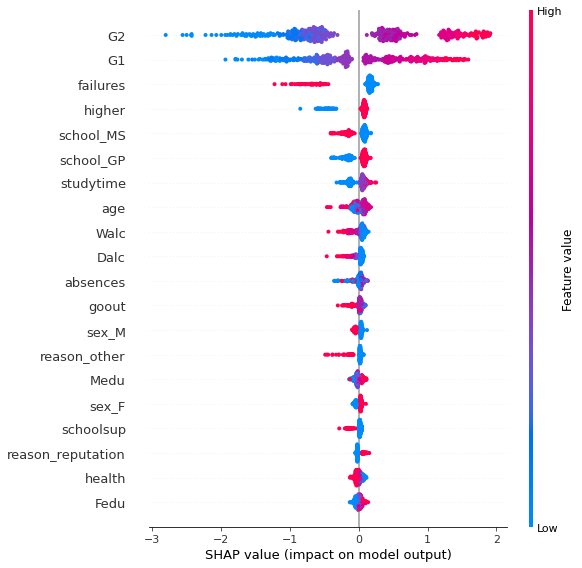

In [ ]:
shap.summary_plot(shap_values, X_train)